# OUTLIER ANALYSES

This notebook contains the operations related to the outliers in the data. Each catalogue, namely *CGRO/BATSE (BATSE)*, *FERMI/GBM (FERMI)*, and *SWIFT/BAT (SWIFT)*, is analyzed seperately in the following feature spaces:

<ol>
    <li>BATSE: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>FERMI: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 25-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>SWIFT: </li>
    <ol>
        <li>T90, </li> 
        <li>T90i, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>Luminosity, </li> 
        <li>T90-Spectral Hardness, </li> 
        <li>T90i-Spectral Hardness, </li> 
        <li>Spectral Hardnesss-Luminosty, </li> 
        <li>T90i-Spectral Hardness-Luminosity. </li> 
    </ol>

</ol>

Please note that each feature space is in log10 base. 

-----

In [1]:
%load_ext autoreload
%autoreload 2

Importing necessary libraries:

In [57]:
import sys
# add grbttools to path
sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
import numpy as np

warnings.filterwarnings("ignore")
np.random.seed(1773)

## 1. BATSE

### a. Duration (lgT90)

Data is read from "../datasets/batse.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [58]:
df_batse_t90 = data_operations.load(cat_name="batse", feats=["lgT90"])
df_batse_t90.sample(5)

,lgT90
trigger_num,
2725,1.054153
5545,1.098436
7209,1.665318
214,1.659878
297,-0.017729


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2037
Number of outliers: 12
Number of inliers: 2025


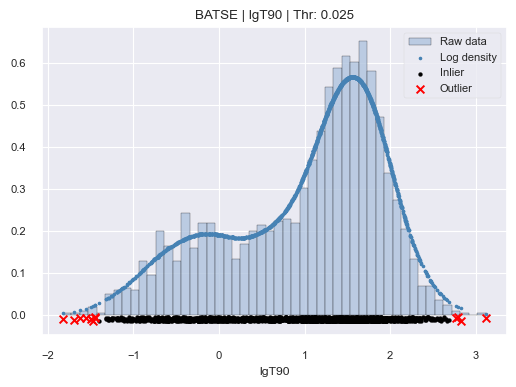

In [27]:
batse_outliers_t90 = data_operations.find_outliers(
    data=df_batse_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.025,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Spectral Hardness (lgHrd)

Data is read from "../datasets/batse.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [12]:
df_batse_hrd = data_operations.load(cat_name="batse", feats=["lgHrd"])
df_batse_hrd.sample(5)

,lgHrd
trigger_num,
5574,0.419138
5605,-0.550477
6234,0.760665
3618,0.896536
1359,0.910188


Threshold density for Kernel Density Estimation algorithm is set to 0.02. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2095
Number of outliers: 14
Number of inliers: 2081


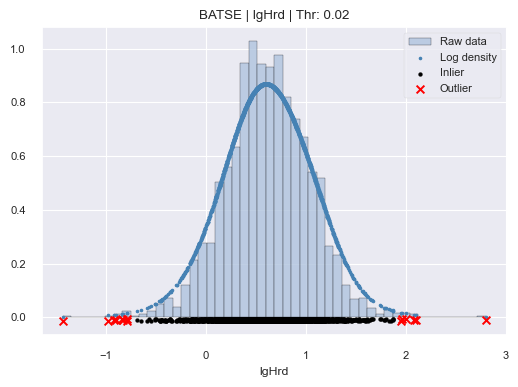

In [52]:
batse_outliers_hrd = data_operations.find_outliers(
    data=df_batse_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.02,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [16]:
data_operations.check_for_normality(data=batse_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.999, p=0.263
  > Sample looks Gaussian (fail to reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.017, p=0.616
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=0.428
  > Critical values: [0.575 0.655 0.785 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample looks Gaussian (fail to reject H0) at the 15.0% level
  > Sample looks Gaussian (fail to reject H0) at the 10.0% level
  > Sample looks Gaussian (fail to reject H0) at the 5.0% level
  > Sample looks Gaussian (fail to reject H0) at the 2.5% level
  > Sample looks Gaussian (fail to reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=0.685, p=0.710
  > Sample looks Gaussian (fail to reject H0)


### c. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/batse.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [17]:
df_batse_t90_hrd = data_operations.load(cat_name="batse", feats=["lgT90", "lgHrd"])
df_batse_t90_hrd.sample(5)

,lgT90,lgHrd
trigger_num,,
5627,0.881727,-0.097755
1734,1.669503,0.238478
3774,-0.659556,0.404440
5644,1.205854,0.759296
7472,0.291813,1.216195


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1937
Number of outliers: 13
Number of inliers: 1924


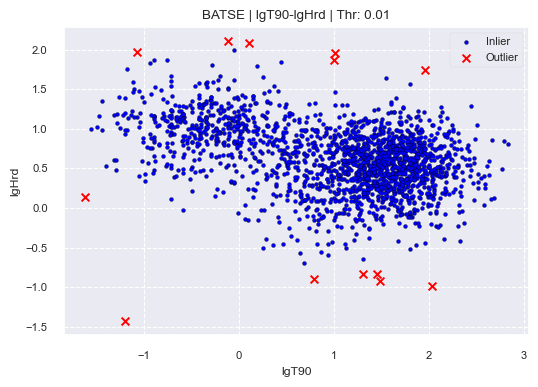

In [53]:
batse_outliers_t90_hrd = data_operations.find_outliers(
    data=df_batse_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.01,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

-----

## 2. FERMI

### a. Duration (lgT90)

Data is read from "../datasets/fermi.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [19]:
df_fermi_t90 = data_operations.load(cat_name="fermi", feats=["lgT90"])
df_fermi_t90.sample(5)

,lgT90
984,1.402777
959,0.839604
2799,1.677753
412,1.403875
1301,-0.494850


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 3568
Number of outliers: 13
Number of inliers: 3555


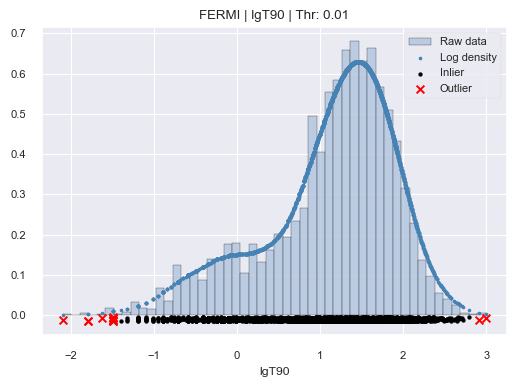

In [54]:
fermi_outliers_t90 = data_operations.find_outliers(
    data=df_fermi_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.01,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Spectral Hardness (lgHrd)

Data is read from "../datasets/fermi.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [55]:
df_fermi_hrd = data_operations.load(cat_name="fermi", feats=["lgHrd"])
df_fermi_hrd.sample(5)

,lgHrd
1610,0.546467
1740,0.391602
1755,0.462999
2767,0.434461
744,0.066842


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2311
Number of outliers: 12
Number of inliers: 2299


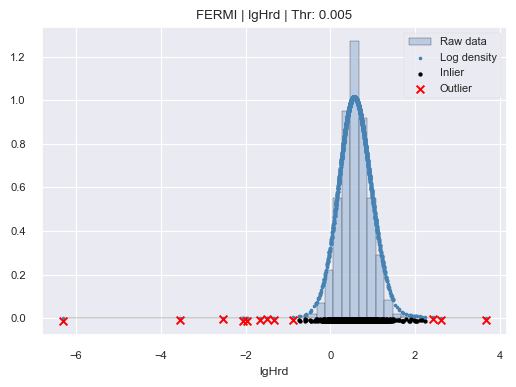

In [56]:
fermi_outliers_hrd = data_operations.find_outliers(
    data=df_fermi_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.005,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [29]:
data_operations.check_for_normality(data=fermi_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.990, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.035, p=0.007
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=3.089
  > Critical values: [0.575 0.655 0.786 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=78.378, p=0.000
  > Sample does not look Gaussian (reject H0)


### c. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/fermi.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [30]:
df_fermi_t90_hrd = data_operations.load(cat_name="fermi", feats=["lgT90", "lgHrd"])
df_fermi_t90_hrd.sample(5)

,lgT90,lgHrd
1441,-0.415669,1.180002
554,1.381368,0.998188
1513,1.939724,0.680338
2284,1.362482,-0.071584
29,1.682398,0.348873


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2310
Number of outliers: 19
Number of inliers: 2291


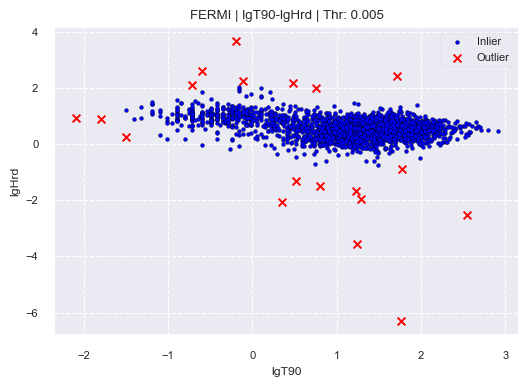

In [32]:
fermi_outliers_t90_hrd = data_operations.find_outliers(
    data=df_fermi_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.005,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

----

## 3. SWIFT

### a. Duration (lgT90)

Data is read from "../datasets/swift.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [59]:
df_swift_t90 = data_operations.load(cat_name="swift", feats=["lgT90"])
df_swift_t90.sample(5)

,lgT90
433,1.196453
831,2.196762
1181,1.888539
715,1.575003
1514,0.595055


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1503
Number of outliers: 9
Number of inliers: 1494


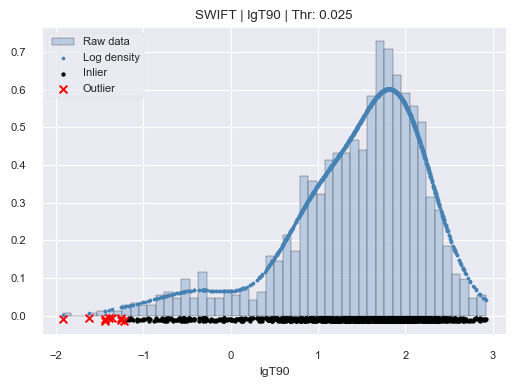

In [34]:
swift_outliers_t90 = data_operations.find_outliers(
    data=df_swift_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Intrinsic Duration (lgT90i)

Data is read from "../datasets/swift.xlsx" and intrinsic duration (lgT90i) feature space is loaded. Five random samples are printed.

In [35]:
df_swift_t90i = data_operations.load(cat_name="swift", feats=["lgT90i"])
df_swift_t90i.sample(5)

,lgT90i
117,0.398157
642,1.169945
496,0.549898
1247,1.689585
1009,1.160339


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 484
Number of outliers: 4
Number of inliers: 480


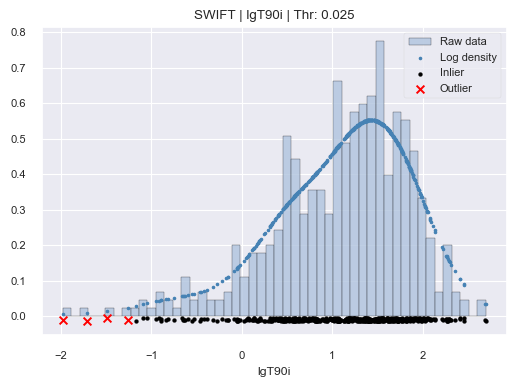

In [36]:
swift_outliers_t90i = data_operations.find_outliers(
    data=df_swift_t90i.copy(),
    feat_space=["lgT90i"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    figsize=(6, 4),
    verbose=True,
)

### c. Spectral Hardness (lgHrd)

Data is read from "../datasets/swift.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [37]:
df_swift_hrd = data_operations.load(cat_name="swift", feats=["lgHrd"])
df_swift_hrd.sample(5)

,lgHrd
1176,-0.46160
638,-0.17490
916,0.09459
846,-0.11732
42,0.02912


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1490
Number of outliers: 3
Number of inliers: 1487


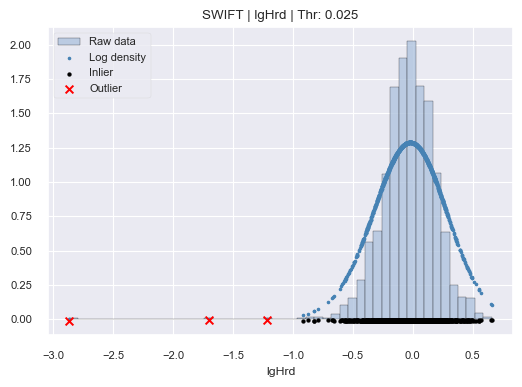

In [38]:
swift_outliers_hrd = data_operations.find_outliers(
    data=df_swift_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [39]:
data_operations.check_for_normality(data=swift_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.993, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.032, p=0.085
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=1.926
  > Critical values: [0.574 0.654 0.785 0.916 1.089]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=32.193, p=0.000
  > Sample does not look Gaussian (reject H0)


### d. Luminosity (lgLum)

Data is read from "../datasets/swift.xlsx" and luminosity (lgLum) feature space is loaded. Five random samples are printed.

In [40]:
df_swift_lum = data_operations.load(cat_name="swift", feats=["lgLum"])
df_swift_lum.sample(5)

,lgLum
999,50.094951
1371,51.310004
1057,51.518355
776,50.358563
498,50.599444


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 10
Number of inliers: 463


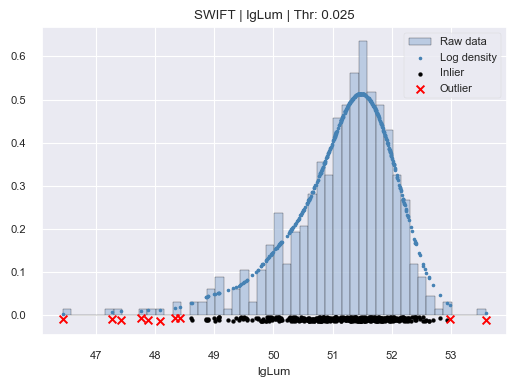

In [41]:
swift_outliers_lum = data_operations.find_outliers(
    data=df_swift_lum.copy(),
    feat_space=["lgLum"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### e. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/swift.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [42]:
df_swift_t90_hrd = data_operations.load(cat_name="swift", feats=["lgT90", "lgHrd"])
df_swift_t90_hrd.sample(5)

,lgT90,lgHrd
1183,0.691258,0.18294
298,0.850769,0.01711
1481,1.710591,0.03742
99,-1.193820,0.16099
1268,2.208774,-0.07579


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1477
Number of outliers: 7
Number of inliers: 1470


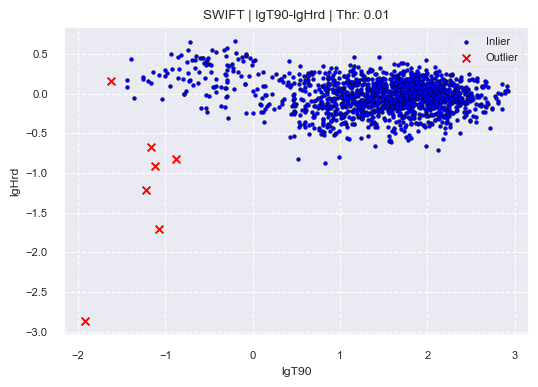

In [43]:
swift_outliers_t90_hrd = data_operations.find_outliers(
    data=df_swift_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### f. Intrinsic Duration-Spectral Hardness (lgT90i-lgHrd)

Data is read from "../datasets/swift.xlsx", intrinsic duration (lgT90i) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [44]:
df_swift_t90i_hrd = data_operations.load(cat_name="swift", feats=["lgT90i", "lgHrd"])
df_swift_t90i_hrd.sample(5)

,lgT90i,lgHrd
1470,0.914970,-0.23064
612,0.397000,-0.15448
658,1.498162,0.12336
1110,1.334232,0.12311
845,0.999596,-0.15349


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 478
Number of outliers: 3
Number of inliers: 475


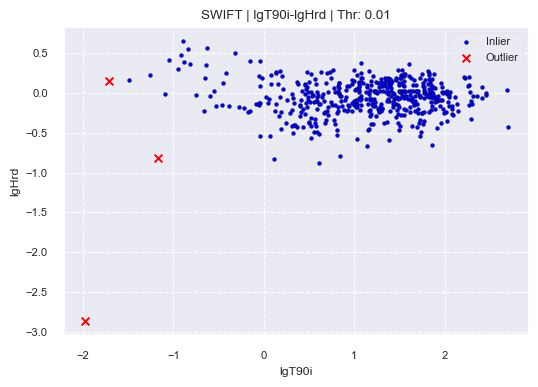

In [45]:
swift_outliers_t90i_hrd = data_operations.find_outliers(
    data=df_swift_t90i_hrd.copy(),
    feat_space=["lgT90i", "lgHrd"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### g. Spectral Hardness-Luminosity (lgHrd-lgLum)

Data is read from "../datasets/swift.xlsx", spectral hardness (lgHrd) and lumşinosity (lgLum) feature spaces are loaded. Five random samples are printed.

In [46]:
df_swift_hrd_lum = data_operations.load(cat_name="swift", feats=["lgHrd", "lgLum"])
df_swift_hrd_lum.sample(5)

,lgHrd,lgLum
1503,-0.17256,51.344744
658,0.12336,51.753015
1096,0.37933,50.839100
950,0.26921,51.049103
590,-2.86875,48.419237


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 7
Number of inliers: 466


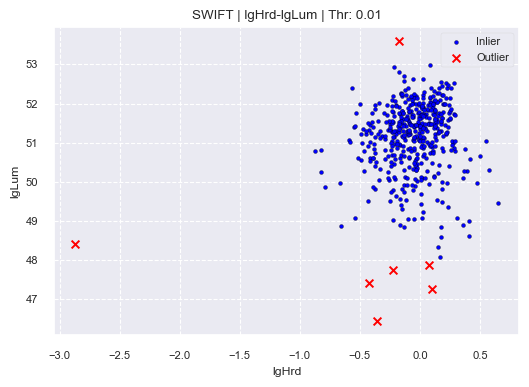

In [47]:
swift_outliers_hrd_lum = data_operations.find_outliers(
    data=df_swift_hrd_lum.copy(),
    feat_space=["lgHrd", "lgLum"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### h. Intrinsic Duration-Spectral Hardness-Luminosity (lgT90i - lgHrd - lgLum)

Data is read from "../datasets/swift.xlsx", intrinsic duration (lgT90i), spectral hardness (lgHrd), and luminosity (lgLum) feature spaces are loaded. Five random samples are printed.

In [48]:
df_swift_t90i_hrd_lum = data_operations.load(
    cat_name="swift", feats=["lgT90i", "lgHrd", "lgLum"]
)
df_swift_t90i_hrd_lum.sample(5)

,lgT90i,lgHrd,lgLum
1355,0.978453,-0.22136,52.201756
1335,1.484296,0.29236,51.044536
1147,0.697980,0.25444,51.823634
1165,1.938525,-0.08671,51.276349
61,1.316799,0.08694,52.991188


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 12
Number of inliers: 461


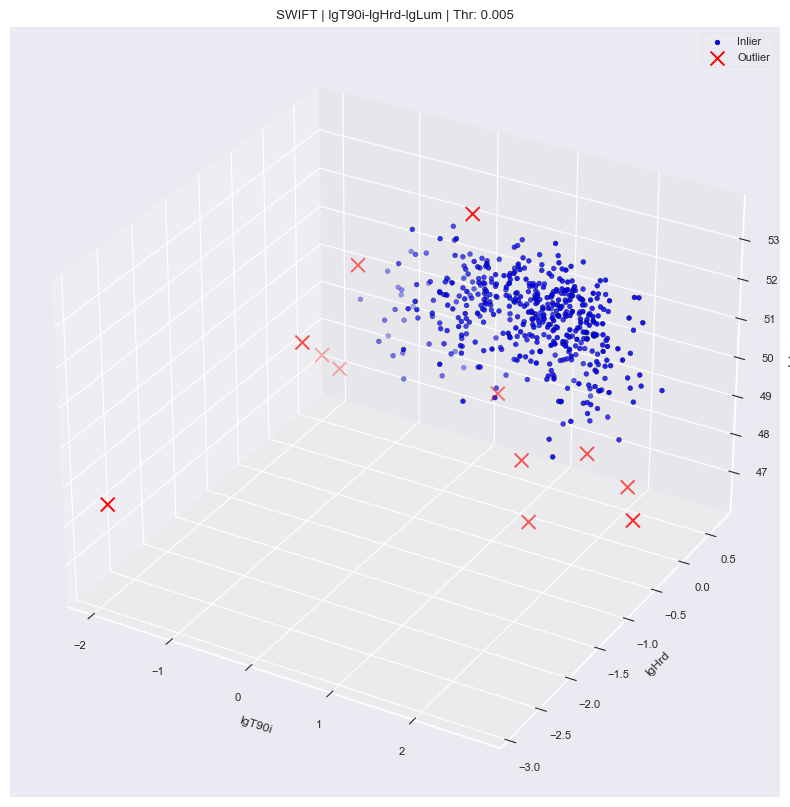

In [51]:
swift_outliers_t90i_hrd_lum = data_operations.find_outliers(
    data=df_swift_t90i_hrd_lum.copy(),
    feat_space=["lgT90i", "lgHrd", "lgLum"],
    threshold_density=0.005,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    figsize=(15, 10),
    verbose=True,
)

-----